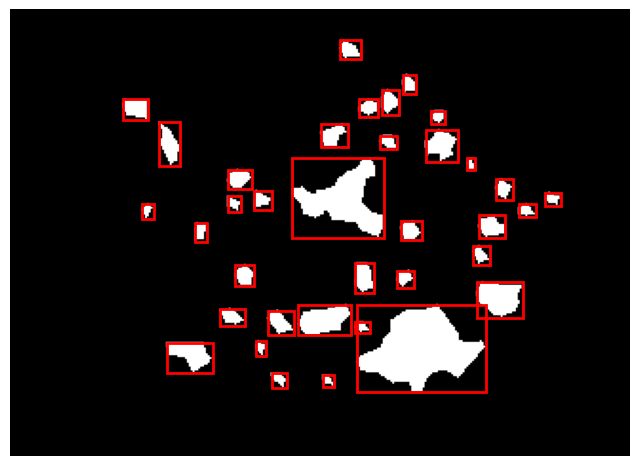

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label

def extract_bboxes(mask):
    labeled_mask = label(mask)
    boxes = []
    for region in range(1, np.max(labeled_mask) + 1):
        where = np.where(labeled_mask == region)
        y1, x1, y2, x2 = np.min(where[0]), np.min(where[1]), np.max(where[0]), np.max(where[1])
        boxes.append([y1, x1, y2 + 1, x2 + 1])  # Adjust indices as needed
    return boxes

# Load a single mask
mask_path = 'image.png'  # Update this path
mask = cv2.imread(mask_path, 0)  # Load as grayscale

# Ensure mask is binary
mask = mask > 0  # Adjust threshold as needed

# Extract bounding boxes from the mask
boxes = extract_bboxes(mask)

# Display the mask and bounding boxes
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.imshow(mask, cmap='gray')

# Plot each bounding box
for box in boxes:
    y1, x1, y2, x2 = box
    rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color='red', linewidth=2)
    ax.add_patch(rect)

ax.set_axis_off()
plt.show()
